In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

### Step 2: Load the Dataset

In [42]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Step 3: Data Exploration

In [5]:
#data information or Dataset statistics
print(f'Number of variables: ',df.shape[1])
print(f'Number of observations: ',df.shape[0])
print(f'Number of duplicates: ',df.duplicated().sum())
print(f'Missing cells: ',df.isnull().sum().sum())
print(f'numeric values: ',len(df.select_dtypes(include=np.number).columns))
print(f'categories values: ',len(df.select_dtypes(include='O').columns))

Number of variables:  12
Number of observations:  10000
Number of duplicates:  0
Missing cells:  0
numeric values:  10
categories values:  2


In [7]:
#data dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
# Get a summary of the dataset
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
credit_score,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
products_number,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
active_member,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
churn,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


### Step 4 :  EDA and data visualization

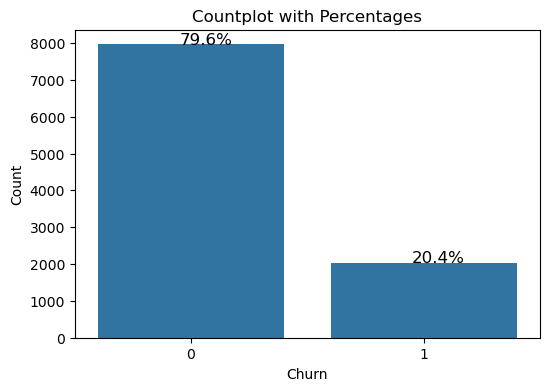

In [11]:
# Create countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='churn', data=df)

# Calculate percentages
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), size=12)

# Display the plot
plt.title('Countplot with Percentages')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

The bar graph titled "Distribution of Churn" shows the number of customers who have churned (category 1) versus those who have not churned (category 0). The vertical axis represents the count of customers, and the horizontal axis represents the churn status. 
- Category 0 represents customers who have not churned, and the taller bar indicates more customers who have not churned in this Category.
- Category 1 represents customers who have churned, and the shorter bar indicates more customers who have churned.

In [50]:
df['active_member'].value_counts()

active_member
1    5151
0    4849
Name: count, dtype: int64

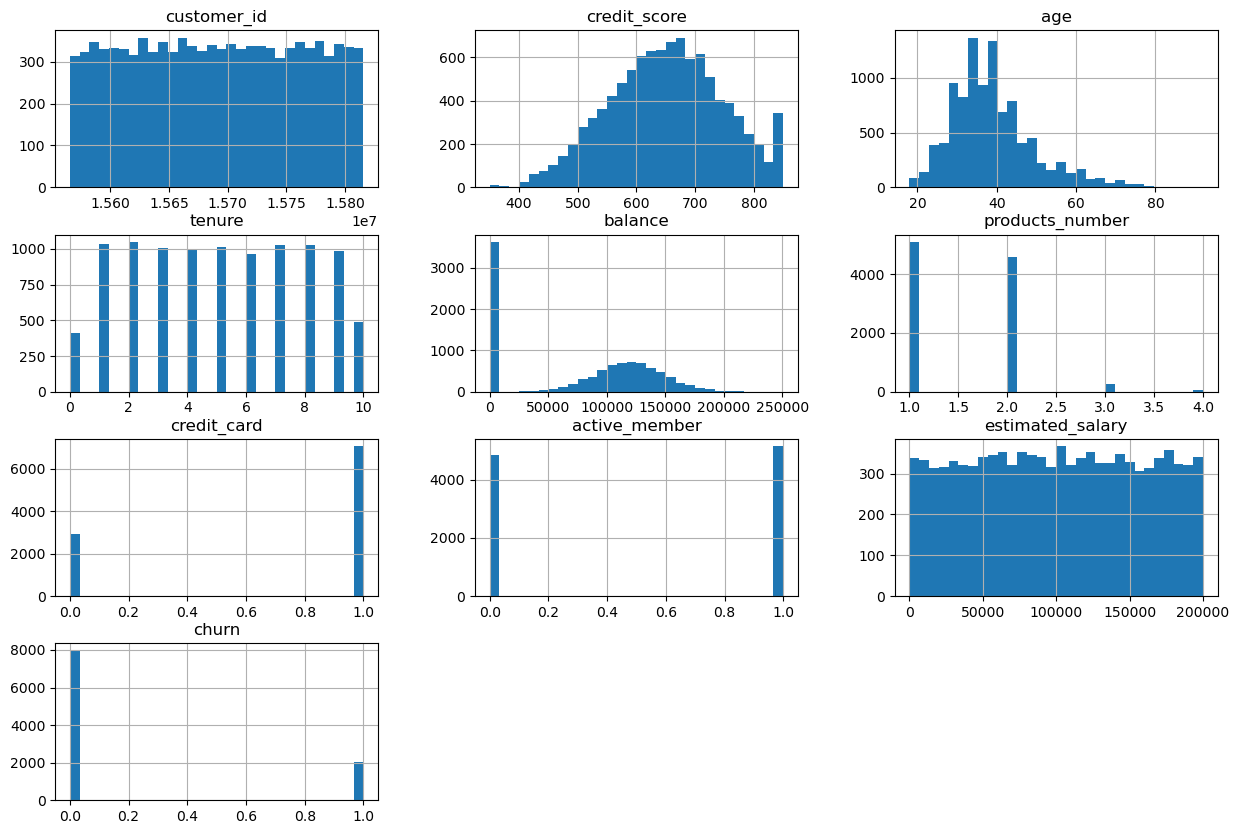

In [44]:
# Visualize the distribution of numerical features
df.hist(bins=30, figsize=(15, 10))
plt.show()



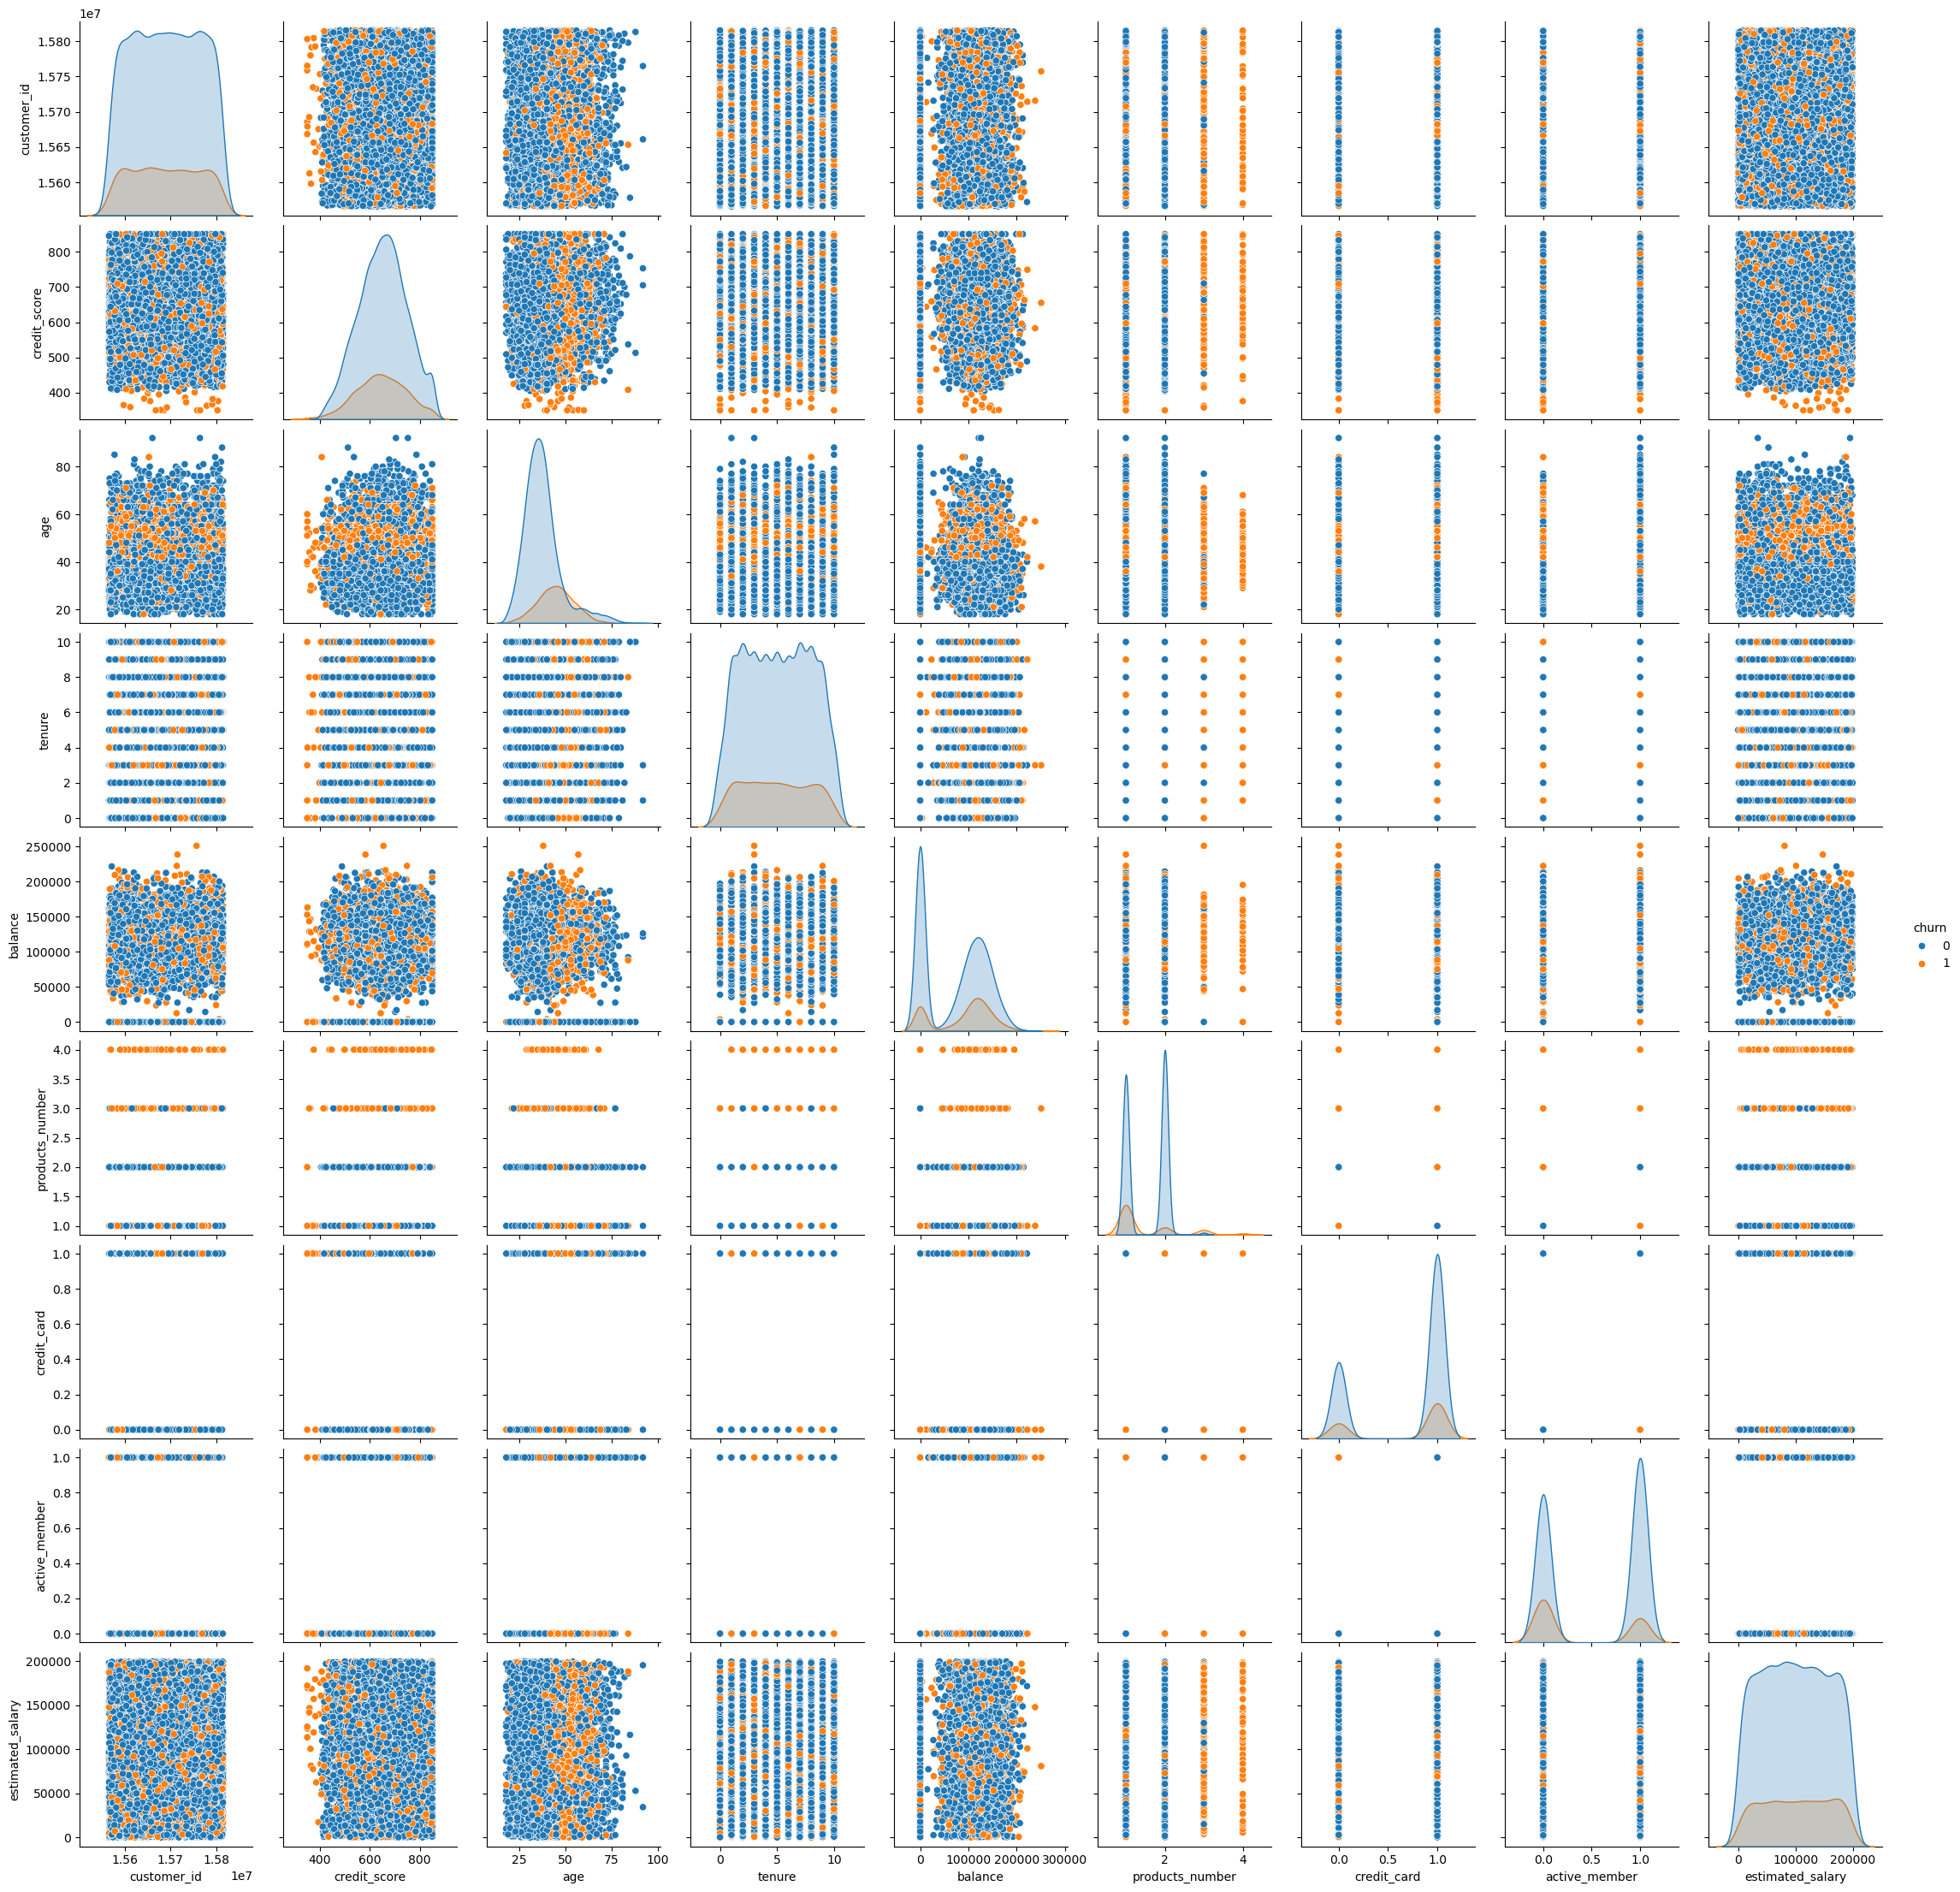

In [52]:
# Pairplot to visualize relationships between features
plt.figsize=(15, 10)
sns.pairplot(df, hue='churn')
plt.show()

In [18]:
numeric_cols=df.select_dtypes(include=np.number)

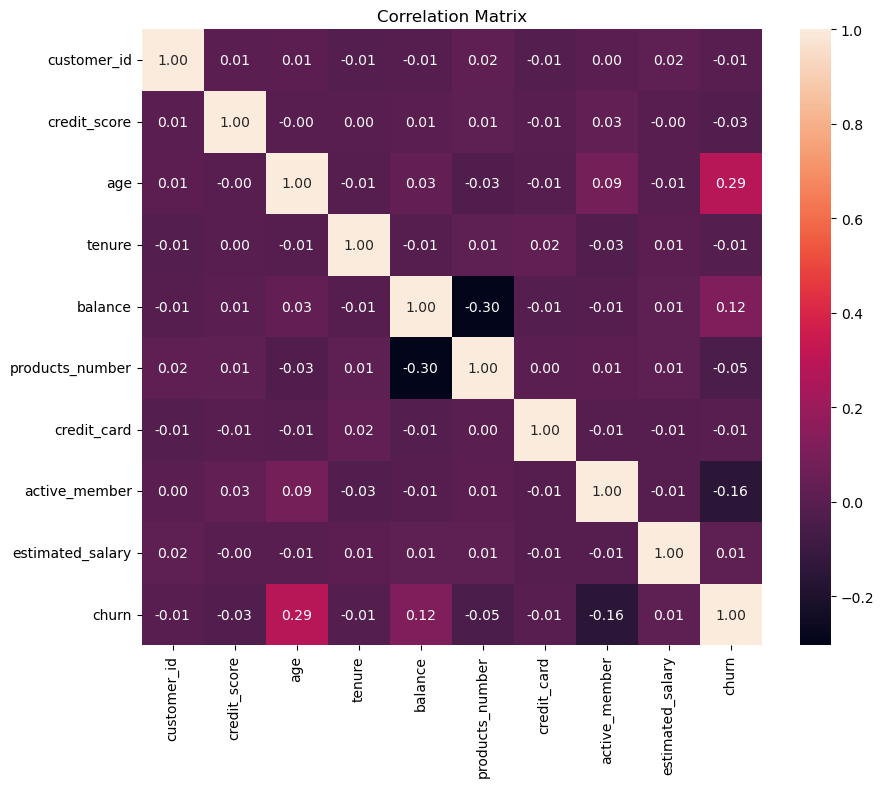

In [19]:
# Correlation matrix to understand relationships between features
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True,  fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### key insight:

This correlation matrix heatmap provides insights into the relationships between various features in the dataset:

- Age and Churn: There is a moderate positive correlation between age and churn, suggesting that older customers are more likely to churn.
- Active Member and Churn: A negative correlation between being an active member and churn suggests that active members are less likely to churn.
- Balance and Products Number: A negative correlation between balance and the number of products indicates that customers with higher balances tend to have fewer products.
- Credit Score and Balance: There is a slight positive correlation between credit score and balance, indicating that customers with higher credit scores tend to have higher balances.

<Axes: xlabel='country'>

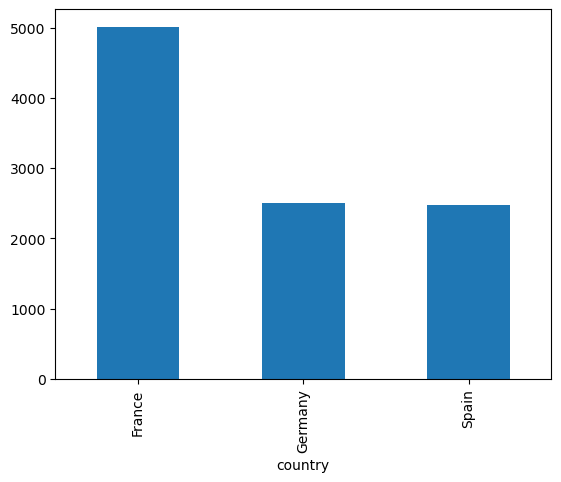

In [41]:
df['country'].value_counts().plot.bar()

<Axes: xlabel='gender'>

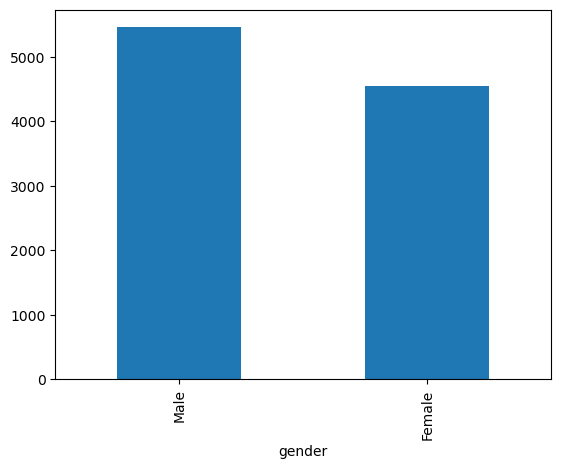

In [24]:
df['gender'].value_counts().plot.bar()

<Axes: xlabel='country,gender,churn'>

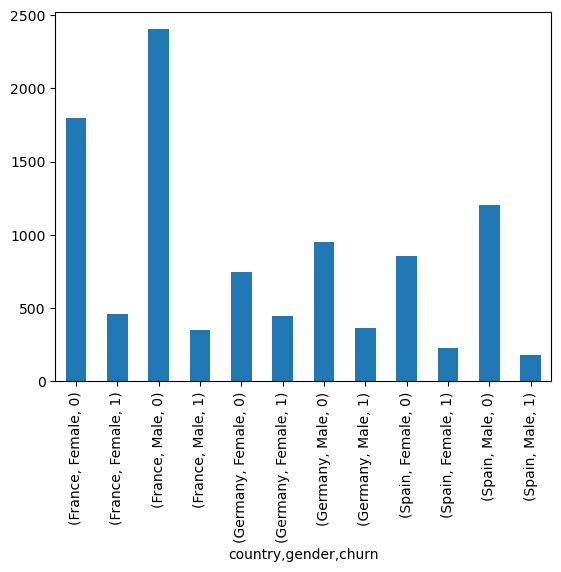

In [13]:
df.groupby(['country','gender'])['churn'].value_counts().plot.bar()

This bar graph provides insights into customer churn across different countries and genders:
- France:
  * Females: Higher churn rate compared to males.
  * Males: Lower churn rate.
- Germany:
  * Females: Higher churn rate compared to males.
  * Males: Lower churn rate.
- Spain:
  * Females: Higher churn rate compared to males.
  * Males: Lower churn rate.

### EDA result:

- Gender Difference: Females have a higher churn rate than males in all three countries.
- Country Comparison: The churn rate varies by country, with Germany showing the highest churn rates for both genders.
- Age and Churn: There is a moderate positive correlation between age and churn, suggesting that older customers are more likely to churn.
- Active Member and Churn: A negative correlation between being an active member and churn suggests that active members are less likely to churn.

In [13]:
categories_features=df.select_dtypes(include='O')
categories_features

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [15]:
categories_dummies=pd.get_dummies(categories_features,dtype=float)
categories_dummies

,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,1.0


In [17]:
df = pd.concat([df,categories_dummies], axis=1)

In [19]:
cols=['customer_id','gender','country']
df.drop(cols,axis=1,inplace=True)

In [21]:
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


In [33]:
# the features they related to Target
features=['age','gender_Female','gender_Male','country_France','country_Spain','country_Germany','active_member']

### Step 5:  building Model 

In [23]:
# Define features and target variable
X = df.drop(['churn'], axis=1) # Features
y = df['churn']                  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 6: Model Training and Evaluation

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
# build model
model = RandomForestClassifier()
# Train model and evaluate performance

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
    
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
    
accuracy =accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

Confusion Matrix:
[[1544   63]
 [ 210  183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 86.35%



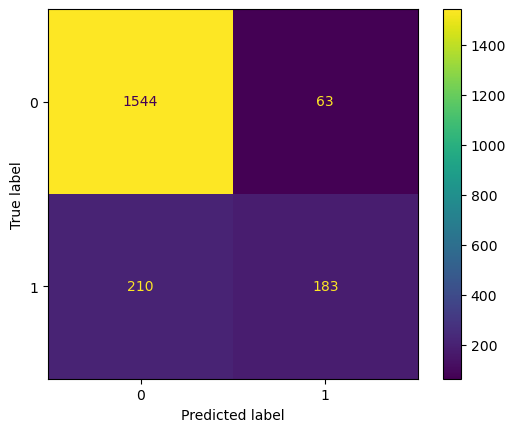

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

- This confusion matrix provides insights into the performance of your classification model:

   * True Positives (1544): The model correctly predicted 1544 instances as class ‘0’.
   * False Positives (63): The model incorrectly predicted 63 instances as class ‘1’ when they are actually class ‘0’.
   * False Negatives (210): The model incorrectly predicted 210 instances as class ‘0’ when they are actually class ‘1’.
   * True Negatives (183): The model correctly predicted 183 instances as class ‘1’.
- Key Insights:
  * High True Positives: The model is good at correctly identifying class ‘0’.
  * False Negatives: There is a significant number of false negatives, indicating the model struggles to correctly identify class ‘1’.
  * Model Improvement: Focus on reducing false negatives to improve the model’s accuracy for class ‘1’.

### Step 7: Feature Importance Analysis (for Tree-Based Models)

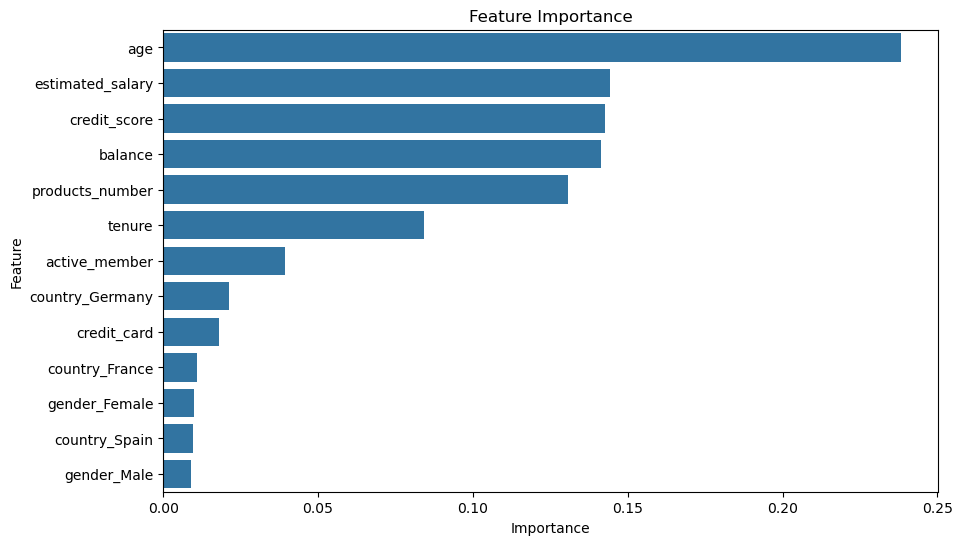

In [32]:
# Feature importance for Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
importances = forest_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


#### result:

Title: Feature Importance Bar Chart
Insights:
- The most important feature is Age, indicating that age significantly impacts churn prediction.
- Estimated Salary is also significant, suggesting that financial status plays a crucial role.
- Credit Score and Balance are important but less so than age and salary.
- Gender is the least important feature, implying that gender has minimal impact on the model’s predictions.